# SIGNAL PROCESSING SYSTEM DESIGN LABORATORY(EE69205)

#Part C: CAPSTONE PROJECT

    NAME: KONAPALLI KUMAR 
    ROLL NO: 23EE65R12
        
                      CONNECTED COMPONENT LABELLING USING TWO PASS ALGORITHM
    

In [ ]:
#DFT FIRST SEARCH BASED LABELLING(4 POINT CONNECTIVITY)

In [32]:
#Using onePixel at a time and using 8 point connectivity

import time
import timeit

def label_connected_components(data):
    def dfs(row, col, current_label):
        if row < 0 or row >= rows or col < 0 or col >= cols:
            return

        if data[row][col] == 1 and labels[row][col] == 0:
            labels[row][col] = current_label

            for dr, dc in neighbors:
                new_row, new_col = row + dr, col + dc
                dfs(new_row, new_col, current_label)

    rows, cols = len(data), len(data[0])
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1),(-1,1), (1,1), (1,-1), (-1,-1)]
    labels = [[0 for _ in range(cols)] for _ in range(rows)]
    current_label = 0
    
    
    start= time.time()
    for row in range(rows):
        for col in range(cols):
            if data[row][col] == 1 and labels[row][col] == 0:
                current_label += 1
                dfs(row, col, current_label)
               
    end= time.time()
    return labels


print("The time of execution of above program is :",(end-start) * 10**3, "ms")
print(start)
print(end)
# print("The time of execution of above program is :", (end-start),"sec")
 
# Example usage:
data = [
    [0, 1, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0]
]

result = label_connected_components(data)
for row in result:
    print(row)

The time of execution of above program is : 992028.7642478943 ms
1699446785.5599456
1699447777.5887098
[0, 1, 0, 0, 2]
[1, 1, 0, 0, 0]
[0, 0, 1, 0, 3]
[0, 0, 0, 0, 0]
[4, 4, 0, 5, 0]


In [ ]:
#DFT FIRST SEARCH BASED LABELLING(8 POINT CONNECTIVITY)

In [22]:
#Two pass algorithm using  8 point connectivity
import numpy as np

def count_blobs(img):
    # Convert the input list of lists to a NumPy array
    #im = np.array(img)
    im = img
    h, w = im.shape

    # Initialize labels and tag
    labels = np.zeros((h, w), dtype=int)
    tag = 1

    # Initialize a dictionary for equivalence classes
    equiv_dict = {}

    # First Pass
    for row in range(h):
        for col in range(w):
            if im[row, col] == 1:
                neighbors = []

                # Left neighbor
                if col > 0:
                    neighbors.append(labels[row, col - 1])

                # Top-left neighbor
                if row > 0 and col > 0:
                    neighbors.append(labels[row - 1, col - 1])

                # Top neighbor
                if row > 0:
                    neighbors.append(labels[row - 1, col])

                # Top-right neighbor
                if row > 0 and col < w - 1:
                    neighbors.append(labels[row - 1, col + 1])

                non_zero_neighbors = [n for n in neighbors if n != 0]

                if not non_zero_neighbors:
                    labels[row, col] = tag
                    tag += 1
                else:
                    min_neighbor = min(non_zero_neighbors)
                    labels[row, col] = min_neighbor

                    for neighbor in non_zero_neighbors:
                        if neighbor != min_neighbor:
                            if min_neighbor in equiv_dict:
                                equiv_dict[min_neighbor].add(neighbor)
                            else:
                                equiv_dict[min_neighbor] = {neighbor}

    # Restructure Equivalence Classes
    for label in equiv_dict:
        root = label
        while root in equiv_dict:
            root = min(equiv_dict[root])
        for alias in equiv_dict[label]:
            equiv_dict[root].update(equiv_dict[alias])
            if alias in equiv_dict:
                equiv_dict[alias].clear()

    # Second Pass
    for row in range(h):
        for col in range(w):
            p = labels[row, col]
            if p in equiv_dict:
                labels[row, col] = min(equiv_dict[p])

    # Get the number of unique labels (excluding background label 0)
    count = len(np.unique(labels)) - 1

    return count, labels

# Sample binary image (0 for background, 1 for blobs)
binary_image =np.array([[0, 1, 0, 0, 1],
                [1, 1, 0, 0, 0],
                [0, 0, 1, 0, 1],
                [0, 0, 0, 0, 0],
                [1, 1, 0, 1, 0]], dtype=np.uint8)

count, labeled_image = count_blobs(binary_image)

print(f"Number of blobs: {count}")
print("Labeled image:")
print(labeled_image)


Number of blobs: 5
Labeled image:
[[0 1 0 0 2]
 [1 1 0 0 0]
 [0 0 1 0 3]
 [0 0 0 0 0]
 [4 4 0 5 0]]


In [46]:
binary_image, binary_image.shape

(array([[0, 1, 0, 0, 1],
        [1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0]], dtype=uint8),
 (5, 5))

In [ ]:
#CONNECTED COMPONENT LABELLING USING TWO PASS ALGORITHM(8-POINT CONNECTIVITY)

In [49]:
import numpy as np

def count_blobs1(img):
    h, w = img.shape

    # Initialize labels and tag
    labels = np.zeros((h, w), dtype=int)
    tag = 1

    # Initialize a dictionary for equivalence classes
    equiv_dict = {}

    # First Pass
    for row in range(h):
        for col in range(w):
            if img[row, col] == 1:
                neighbors = []

                # Left neighbor
                if col > 0:
                    neighbors.append(labels[row, col - 1])

                # Top-left neighbor
                if row > 0 and col > 0:
                    neighbors.append(labels[row - 1, col - 1])

                # Top neighbor
                if row > 0:
                    neighbors.append(labels[row - 1, col])

                # Top-right neighbor
                if row > 0 and col < w - 1:
                    neighbors.append(labels[row - 1, col + 1])

                non_zero_neighbors = [n for n in neighbors if n != 0]

                if not non_zero_neighbors:
                    labels[row, col] = tag
                    tag += 1
                else:
                    min_neighbor = min(non_zero_neighbors)
                    labels[row, col] = min_neighbor

                    for neighbor in non_zero_neighbors:
                        if neighbor != min_neighbor:
                            if min_neighbor in equiv_dict:
                                equiv_dict[min_neighbor].add(neighbor)
                            else:
                                equiv_dict[min_neighbor] = {neighbor}

    # Restructure Equivalence Classes
    for label in equiv_dict:
        root = label
        while root in equiv_dict:
            root = min(equiv_dict[root])
        for alias in equiv_dict[label]:
            equiv_dict[root].update(equiv_dict[alias])
            if alias in equiv_dict:
                equiv_dict[alias].clear()

    # Second Pass
    for row in range(h):
        for col in range(w):
            p = labels[row, col]
            if p in equiv_dict:
                labels[row, col] = min(equiv_dict[p])

    # Get the number of unique labels (excluding background label 0)
    count = len(np.unique(labels)) - 1

    return count, labels

In [ ]:
#CONNECTED COMPONENT LABELLING USING TWO PASS ALGORITHM(4-POINT CONNECTIVITY)

In [37]:
#Using 4 point connecvity in two pass algorithm

import numpy as np

def count_blobs(img):
    im = np.array(img)
    h, w = im.shape
    labels = np.zeros((h, w), dtype=int)
    tag = 1
    equiv_dict = {}

    def find_root(label):
        root = label
        while root in equiv_dict and equiv_dict[root] != root:
            root = equiv_dict[root]
        return root

    for row in range(h):
        for col in range(w):
            if im[row, col] == 1:
                neighbors = []

                if col > 0:
                    neighbors.append(labels[row, col - 1])
                if row > 0:
                    neighbors.append(labels[row - 1, col])

                non_zero_neighbors = [n for n in neighbors if n != 0]

                if not non_zero_neighbors:
                    labels[row, col] = tag
                    tag += 1
                else:
                    min_neighbor = min(non_zero_neighbors)
                    labels[row, col] = min_neighbor

                    for neighbor in non_zero_neighbors:
                        if neighbor != min_neighbor:
                            root_neighbor = find_root(neighbor)
                            root_min = find_root(min_neighbor)
                            equiv_dict[root_neighbor] = root_min

    # Second Pass
    for row in range(h):
        for col in range(w):
            p = labels[row, col]
            if p in equiv_dict:
                labels[row, col] = find_root(p)

    # Get the number of unique labels (excluding background label 0)
    count = len(np.unique(labels)) - 1

    return count, labels

binary_image = [[0, 1, 0, 0, 1],
                [1, 1, 0, 0, 0],
                [0, 0, 1, 0, 1],
                [0, 0, 0, 0, 0],
                [1, 1, 0, 1, 0]]

count, labeled_image = count_blobs(binary_image)

print(f"Number of blobs: {count}")
print("Labeled image:")
print(labeled_image)


Number of blobs: 6
Labeled image:
[[0 1 0 0 2]
 [1 1 0 0 0]
 [0 0 4 0 5]
 [0 0 0 0 0]
 [6 6 0 7 0]]


In [ ]:
#CONNECTED COMPONENT LABELLING USING TWO PASS ALGORITHM FOR AN IMAGE

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

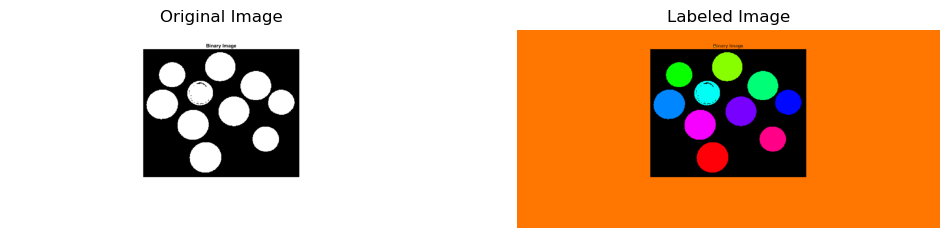

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("C://Users//kumar//OneDrive//Desktop//coins.png")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY)

# Perform connected component labeling
num_labels, labels = cv2.connectedComponents(binary_image)

# Create a color map for visualization
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_image = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_image = cv2.cvtColor(labeled_image, cv2.COLOR_HSV2BGR)

# Set the background label to black
labeled_image[label_hue == 0] = 0

# Display the original and labeled images
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB))
plt.title('Labeled Image'), plt.axis('off')
plt.show()


In [11]:
import time


#Using One point at a time algorithm and 4 point connectivitity

start_time = time.time()
def label_connected_components(data):
    def dfs(row, col, current_label):
        if row < 0 or row >= rows or col < 0 or col >= cols:
            return

        if data[row][col] == 1 and labels[row][col] == 0:
            labels[row][col] = current_label

            for dr, dc in neighbors:
                new_row, new_col = row + dr, col + dc
                dfs(new_row, new_col, current_label)

    rows, cols = len(data), len(data[0])
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    labels = [[0 for _ in range(cols)] for _ in range(rows)]
    current_label = 0

    for row in range(rows):
        for col in range(cols):
            if data[row][col] == 1 and labels[row][col] == 0:
                current_label += 1
                dfs(row, col, current_label)

    return labels
end_time = time.time()
elapsed_time = end_time - start_time
print("Total execution time=",elapsed_time)


# Example usage:
data = [
    [0, 1, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0]
]

result = label_connected_components(data)
for row in result:
    print(row)


Total execution time= 0.0005054473876953125
[0, 1, 0, 0, 2]
[1, 1, 0, 0, 0]
[0, 0, 3, 0, 4]
[0, 0, 0, 0, 0]
[5, 5, 0, 6, 0]
